In [13]:
import yfinance as yf
import mplfinance as mpl
import matplotlib as plt
import pandas as pd

In [14]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')


In [23]:
df['stock'].nunique()


6204

In [28]:
df['headline_len'] = df['headline'].astype(str).str.split().str.len()
df['headline_len'].describe()

count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_len, dtype: float64

In [36]:
df['publisher'].value_counts()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

<Axes: xlabel='publisher'>

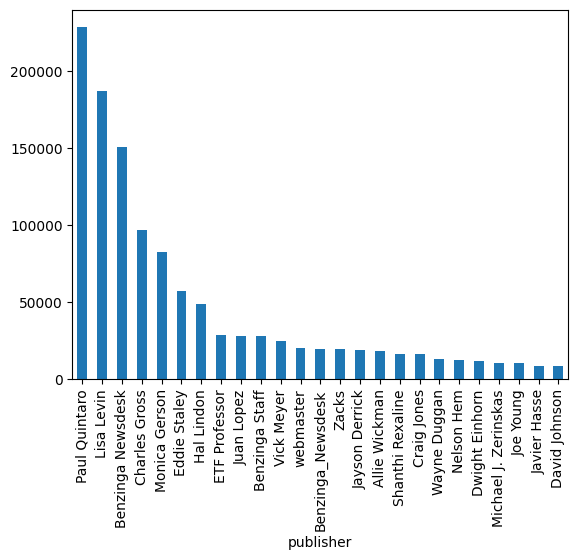

In [38]:
df['publisher'].value_counts().head(25).plot(kind='bar')


In [45]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])



In [46]:
df['date'].isna().sum()


np.int64(0)

In [47]:
df['headline_length'] = df['headline'].str.len()
df['headline_length'].describe()


C:\Users\hp\AppData\Local\Temp\ipykernel_17444\2843634149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['headline_length'] = df['headline'].str.len()


count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64

<Axes: xlabel='date'>

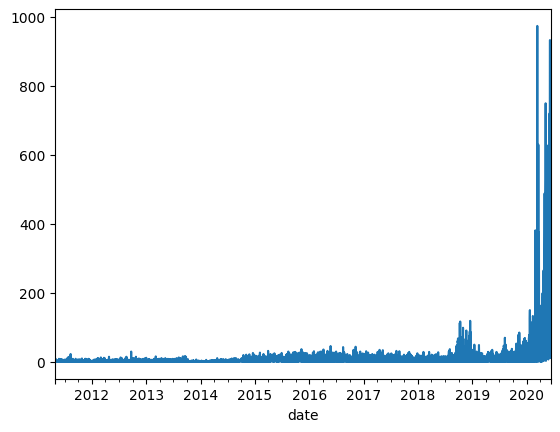

In [48]:
df.set_index('date').resample('D').size().plot()
